<a href="https://colab.research.google.com/github/wgrzyb/PJN_L2/blob/main/PJN_L2_analiza_skladniowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zadanie laboratoryjne nr 2 - analiza składniowa

Wykonał: Wojciech Grzyb

Grupa: WCY19KB2S4

---

1. Utworzyć korpus dokumentów na podstawie 5-10 książek pobranych ze strony Wolne Lektury: https://wolnelektury.pl/
2. Dla każdej z pozycji zwizualizować:  
*   częstość występowania klas gramatycznych
*   częstość występowania części mowy
3. Na podstawie korpusu zbudowanego   z 5 dowolnych książek ściągniętych ze strony Wolne Lektury wyznaczyć i zwizualizować częstość występowania rzeczowników sprowadzonych do form podstawowych.
4. Na podstawie częstości wyznaczonych powyżej  zbudować macierz tfidf, wyłącznie w oparciu o rzeczowniki w formie podstawowej i każdą pozycję zwizualizować w postaci chmury tagów (wordcloud).
5. Podać kilka przykładów  niejednoznaczności znaczeniowej  występujacej w tekstach oraz przyjęty sposób ich rozwiązania 
6. *W wybranej lekturze znaleźć 5  rzeczowników występujących w formie podmiotów oraz pokazać z jakimi czasownikami się łączą  w związku podmiotu z orzeczeniem.

---

In [ ]:
#@title Przygotowanie środowiska
%%capture
# Instalacja Morfeusza 2
!wget -O - http://download.sgjp.pl/apt/sgjp.gpg.key|sudo apt-key add -
!sudo apt-add-repository http://download.sgjp.pl/apt/ubuntu
!sudo apt update
!sudo apt install morfeusz2
!sudo apt install python3-morfeusz2

# Instalacja spaCy
!python3 -m pip install spacy

# Instalacja modelu IPI PAN dla języka polskiego
!wget "http://zil.ipipan.waw.pl/SpacyPL?action=AttachFile&do=get&target=pl_spacy_model_morfeusz-0.1.3.tar.gz"
!mv 'SpacyPL?action=AttachFile&do=get&target=pl_spacy_model_morfeusz-0.1.3.tar.gz' pl_spacy_model_morfeusz-0.1.3.tar.gz
!python3 -m pip install pl_spacy_model_morfeusz-0.1.3.tar.gz

# Linkowanie modelu do spaCy
!python3 -m spacy link pl_spacy_model_morfeusz pl_spacy_model_morfeusz -f

# Dodatkowe zależności:
!python3 -m pip install tqdm
!python3 -m pip install networkx


1) Przygotowanie korpusu dokumentów:

In [ ]:
import requests

corpus = {
    'boska-komedia': 'https://wolnelektury.pl/media/book/txt/boska-komedia-raj.txt',
    'kordian': 'https://wolnelektury.pl/media/book/txt/kordian.txt',
    'przedwiosnie': 'https://wolnelektury.pl/media/book/txt/przedwiosnie.txt',
    'wesele': 'https://wolnelektury.pl/media/book/txt/wesele.txt',
    'zemsta': 'https://wolnelektury.pl/media/book/txt/zemsta.txt'
}

# Pobranie dokumentów
documents = []
for pos in corpus:
  r = requests.get(corpus.get(pos))
  documents.append(r.text)

# Wypisanie pozycji korpusu:
print('Korpus:')
for pos in corpus:
  print(f' * {pos}')


Korpus:
 * boska-komedia
 * kordian
 * przedwiosnie
 * wesele
 * zemsta


2.a) Wizualizacja częstości występowania klas gramatycznych dla każdej pozycji z korpusu:

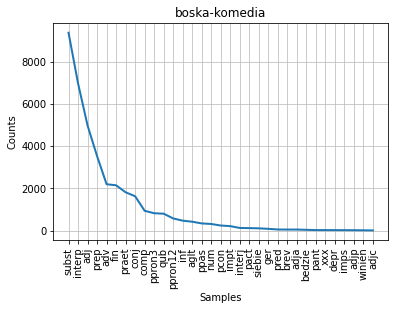

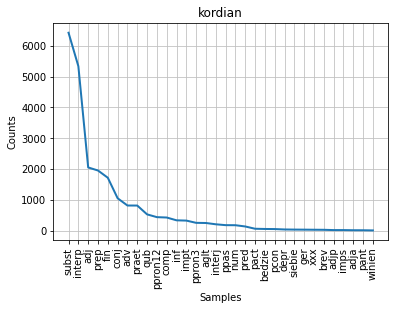

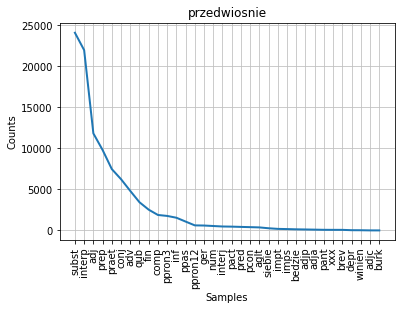

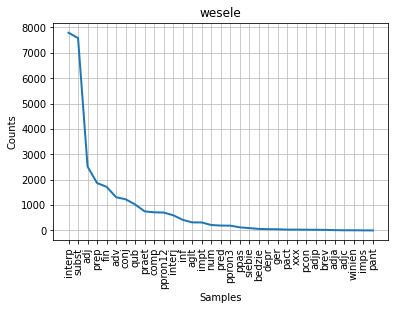

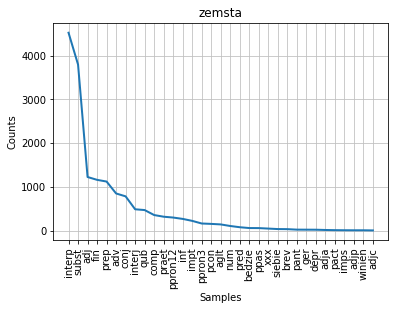

In [ ]:
import nltk
import spacy

nlp = spacy.load("pl_spacy_model_morfeusz")  # Załadowanie modelu IPI PAN

# Utworzenie obiektów klasy Doc dla każdego dokumentu z korpusu
doc_list = []
for i in range(len(documents)):
  doc = nlp(documents[i])  # Utworzenie obiektu klasy Doc (obiektu przechowującego tokeny dokumentu)
  doc_list.append(doc)  # Dodanie utworzonego obiektu do listy

# Wizualizacja częstości występowania klas gramatycznych dla każdego dokumentu z korpusu
for i in range(len(doc_list)):
  doc = doc_list[i]
  # Obliczenie częstości występowania poszczególnych klas gramtycznych
  grammar_classes_freq = {}
  for token in doc:
    if token.tag_ in grammar_classes_freq:
      grammar_classes_freq[token.tag_] += 1
    else:
      grammar_classes_freq[token.tag_] = 1
  # Wizualizacja częstości występowania klas gramatycznych w danym dokumencie
  freq = nltk.FreqDist(grammar_classes_freq)
  freq.plot(cumulative=False, title=list(corpus.keys())[i])


2.b) Wizualizacja częstości występowania części mowy dla każdej pozycji z korpusu:

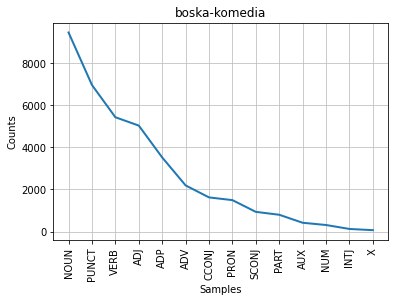

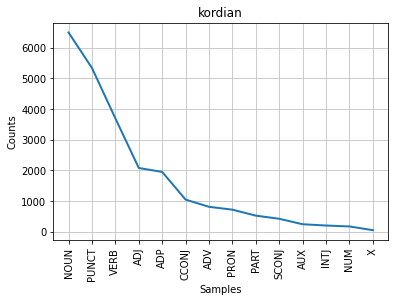

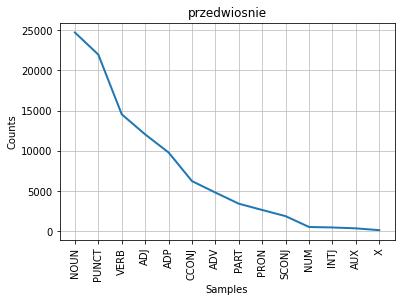

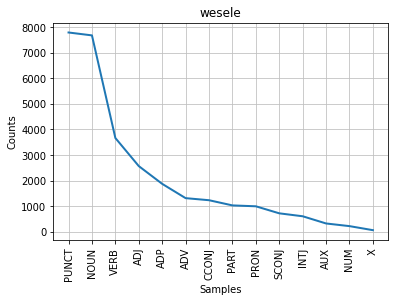

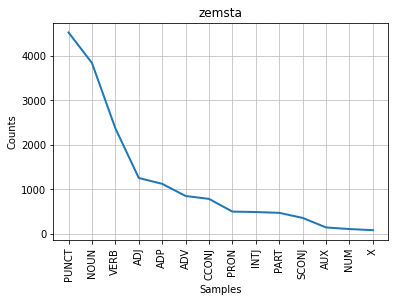

In [ ]:
# Wizualizacja częstości występowania części mowy dla każdego dokumentu z korpusu
for i in range(len(doc_list)):
  doc = doc_list[i]
  # Obliczenie częstości występowania poszczególnych części mowy
  part_of_speech_freq = {}
  for token in doc:
    if token.pos_ in part_of_speech_freq:
      part_of_speech_freq[token.pos_] += 1
    else:
      part_of_speech_freq[token.pos_] = 1
  # Wizualizacja częstości występowania części mowy w danym dokumencie
  freq = nltk.FreqDist(part_of_speech_freq)
  freq.plot(cumulative=False, title=list(corpus.keys())[i])


3) Wizualizacja częstości występowania rzeczowników sprowadzonych do formy podstawowej dla każdej pozycji z korpusu:

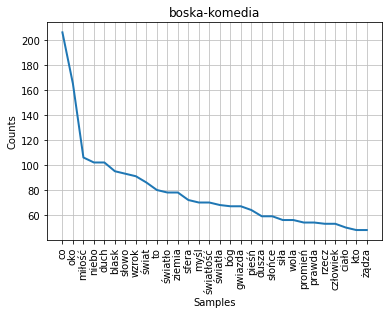

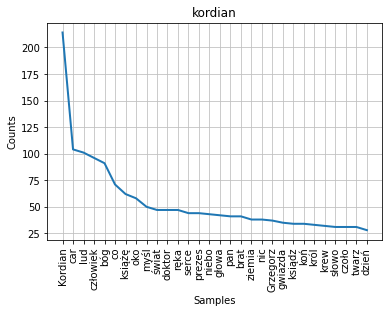

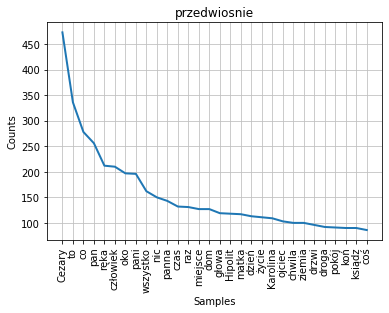

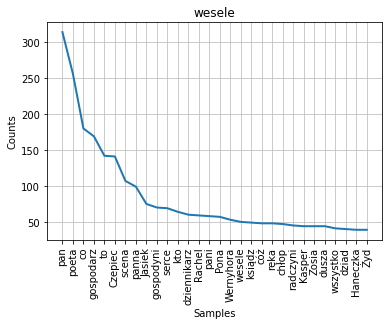

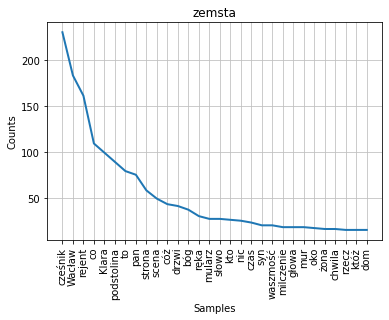

In [ ]:
# Wizualizacja częstości występowania rzeczowników sprowadzonych do formy podstawowej dla każdego dokumentu z korpusu
for i in range(len(doc_list)):
  doc = doc_list[i]
  # Obliczenie częstości występowania poszczególnych rzeczowników sprowadzonych do formy podstawowej
  base_noun_freq = {}
  for token in doc:
    if token.pos_ == 'NOUN':
      if token.lemma_ in base_noun_freq:
        base_noun_freq[token.lemma_] += 1
      else:
        base_noun_freq[token.lemma_] = 1
  # Wizualizacja częstości występowania rzeczowników sprowadzonych do formy podstawowej w danym dokumencie
  freq = nltk.FreqDist(base_noun_freq)
  freq.plot(30, cumulative=False, title=list(corpus.keys())[i])


4) Budowanie macierzy TFIDF oraz wizualizacja każdej pozycji za pomocą chmury tagów:

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Definicja tokenizera
def spacy_tokenizer(sentence):
    doc = nlp(sentence)  # Utworzenie obiektu klasy Doc
    tokens = [token.lemma_ for token in doc if token.pos_ == 'NOUN']  # Wyodrębnienie tylko rzeczowników w formie podstawowej
    return tokens

# Budowanie macierzy TFIDF
vectorizer = TfidfVectorizer(smooth_idf=False, tokenizer=spacy_tokenizer)
tfidf = vectorizer.fit_transform(documents)  # Utworzenie rzadkiej macierzy TFIDF
tfidf_dense = tfidf.todense()  # Utworzenie gęstej macierz TFIDF

# Wizualizacja zbudowanej macierzy za pomocą pandas.DataFrame
target_df = pd.DataFrame(data = corpus.keys(), columns = ['target'])  # Kolumna z nazwami dokumentów
tfidf_dense_list = tfidf_dense.tolist()
feature_names = vectorizer.get_feature_names()
tfidf_df = pd.DataFrame(tfidf_dense_list, columns=feature_names)
final_tfidf_df = pd.concat([target_df, tfidf_df], axis = 1)
print(final_tfidf_df)


          target     Achil      Adam  ...  żądność     żądza     żądło
0  boska-komedia  0.000000  0.013930  ...  0.00802  0.073760  0.000000
1        kordian  0.000000  0.006342  ...  0.00000  0.002799  0.005363
2   przedwiosnie  0.000000  0.001054  ...  0.00000  0.003490  0.001337
3         wesele  0.000000  0.000000  ...  0.00000  0.001025  0.000000
4         zemsta  0.002708  0.000000  ...  0.00000  0.001038  0.000000

[5 rows x 7359 columns]


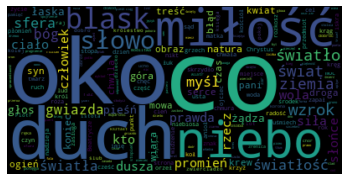

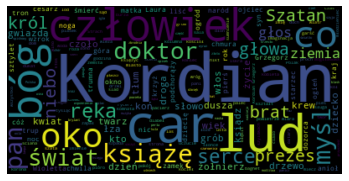

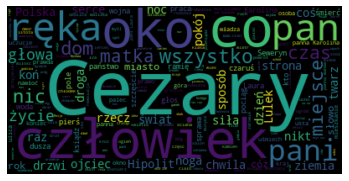

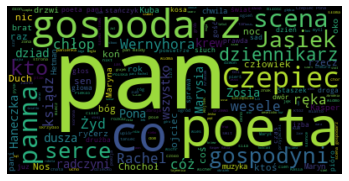

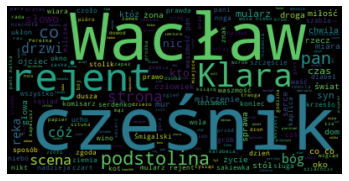

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Wizualizacja każdej pozycji z korpusu za pomocą chmury tagów (wordcloud)
for doc in doc_list:
  # Utworzenie tekstu dla danego dokumentu do wygenerowania chmury tagów
  wordcloud_text = ''
  for token in doc:
      if token.pos_ == 'NOUN':
          wordcloud_text = ' '.join((wordcloud_text, token.lemma_))
  # Wygenerowanie chmury tagów
  wordcloud = WordCloud().generate(wordcloud_text)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()


5) Przykłady niejednoznaczności znaczeniowej występujacej w tekstach oraz przyjęty sposób ich rozwiązania:

In [8]:
text = 'Ten rad kto usłyszał radę, gdyż rad nigy za dużo.'
print(text)
print("{0:15} {1:8} {2:6} {3:15}\n".format(".orth_", ".tag_", ".pos_", "._.feats"))
for token in nlp(text):
  print("{0:15} {1:8} {2:6} {3:15}".format(token.orth_, token.tag_, token.pos_, token._.feats))


Ten rad kto usłyszał radę, gdyż rad nigy za dużo.
.orth_          .tag_    .pos_  ._.feats       

Ten             adj      ADJ    sg:nom:m1:pos  
rad             adj      ADJ    sg:nom:m1:pos  
kto             subst    NOUN   sg:nom:m1      
usłyszał        praet    VERB   sg:m1:perf     
radę            subst    NOUN   sg:acc:f       
,               interp   PUNCT                 
gdyż            comp     SCONJ                 
rad             subst    NOUN   pl:gen:f       
nigy            adv      ADV                   
za              qub      PART                  
dużo            num      NUM    pl:acc:m3:rec  
.               interp   PUNCT                 


Powyżej (jako przykłady niejednoznaczności znaczeniowej występującej w tekstach) przedstawiono zdanie, w którym użyto dwa razy słówka 'rad', jednakże w dwóch rożnych kontekstach.
Pierwsze wystąpienie słówka 'rad' odnosi się do przymiotnika 'rad' (czyli będącego w dobrym nastroju), natomiast drugie wystąpienie to dopełniacz liczby mnogiej od rzeczownika 'rada' (czyli zalecenie, sugestia).

W powyższym przykładzie można zauważyć, iż słówko 'rad' zostało poprawnie otagowane w obu przypadkach.

W celu rozwiązania problemów związanych z niejednoznacznością znaczeniową występującą w tekstach spaCy wykorzystuje wytrenowane wcześniej statystyczne modele (https://spacy.io/usage/spacy-101#statistical-models) do przewidzenia, który znacznik ma największe prawdopodobieństwo zastosowania w danym kontekście. Przykładowo: wytrenowany dla języka angielskiego model może przewidzieć, iż słowo występujące po „the” jest najprawdopodobniej rzeczownikiem.

Wykorzystywany powyżej model 'pl_spacy_model_morfeusz' (https://github.com/ipipan/spacy-pl) został wytrenowany przy użyciu słownika zawierającego 1 milion pozycji z Narodowego Korpusu Języka Polskiego (NKJP) oraz 500 tys. pozycji z korpus częstotliwości języka polskiego lat 60.

6) *Znalezienie 5 rzeczowników występujących w formie podmiotów w wybranej lekturze oraz pokazanie z jakimi czasownikami się one łączą w związku podmiotu z orzeczeniem:

In [9]:
selected_doc = doc_list[0]  # Wybór lektury

# Znalezienie 5 rzeczowników występujących w formie podmiotu we wskazanym dokumencie
subj_pred_table = []
while True:
  i = 0
  for token in selected_doc:
    if token.dep_ == 'nsubj' and token.head.pos_ == 'VERB':
      # Znaleziono rzeczownik występujący w formie potmiotu
      subj_pred_table.append({"subject": token.orth_, "predicate": token.head.orth_})
      i += 1
      if i == 5:
        # Znaleziono 5-ty rzeczownik występujący w formie potmiotu
        break
  # Nie znaleziono 5-ciu rzechowników występujących w formie podmiotu
  break
# Wypisanie znalezionych rzeczowników wraz czasownikami, z którymi się łączą w związku podmiotu z orzeczeniem za pomocą pandas.DataFrame
subj_pred_df = pd.DataFrame(subj_pred_table)
print(subj_pred_df)

    subject     predicate
0     który       porusza
1     świat       porusza
2  Nierówny         rzuca
3        ja           Był
4     Blask  rozpromienia
